In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import re

# Load data

In [3]:
aact_data = pd.read_csv("data/raw_aact/combined_neuro_trials_with_interventions_20240313.csv")
# Convert 'start_date' and 'completion_date' to datetime
aact_data['start_date'] = pd.to_datetime(aact_data['start_date'])
aact_data['completion_date'] = pd.to_datetime(aact_data['completion_date'])

# Extract the year from 'start_date' and 'completion_date'
aact_data['start_year'] = aact_data['start_date'].dt.year
aact_data['completion_year'] = aact_data['completion_date'].dt.year

aact_data['Neurological Disease'] = aact_data['Neurological Disease'].replace({'Parkinson Disease': 'Parkinson\'s Disease'})
aact_data['Neurological Disease'] = aact_data['Neurological Disease'].replace({'Alzheimer Disease': 'Alzheimer\'s Disease'})
aact_data['Neurological Disease'] = aact_data['Neurological Disease'].replace({'Spinal Cord Injuries': 'Spinal Cord Injury'})


In [4]:
aact_data.columns

Index(['nct_id', 'Neurological Disease', 'Disease Class', 'brief_title',
       'study_official_title', 'brief_summary_description', 'start_date',
       'completion_date', 'phase', 'study_type', 'overall_status',
       'country_name', 'intervention_name', 'intervention_type', 'start_year',
       'completion_year'],
      dtype='object')

In [5]:
len(set(aact_data['nct_id']))

46376

In [6]:
len(set(aact_data['nct_id']))

46376

In [7]:
aact_data.head(5)

,nct_id,Neurological Disease,Disease Class,brief_title,study_official_title,brief_summary_description,start_date,completion_date,phase,study_type,overall_status,country_name,intervention_name,intervention_type,start_year,completion_year
0,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Physical activity,Behavioral,2019.0,2026.0
1,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Successful Aging,Behavioral,2019.0,2026.0
2,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Physical activity,Behavioral,2019.0,2026.0
3,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Successful Aging,Behavioral,2019.0,2026.0
4,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Physical activity,Behavioral,2019.0,2026.0


In [8]:
aact_data[aact_data['nct_id']=="NCT05268497"]

,nct_id,Neurological Disease,Disease Class,brief_title,study_official_title,brief_summary_description,start_date,completion_date,phase,study_type,overall_status,country_name,intervention_name,intervention_type,start_year,completion_year
240,NCT05268497,Depression,Psychiatry and Psychology Category,A Study to Assess Feasibility of Using Clinici...,Assessment of Feasibility of Using Clinician-D...,The purpose of this study is to explore feasib...,2022-09-01,2023-06-07,Phase 1,Interventional,Withdrawn,United States,Esketamine,Drug,2022.0,2023.0
261,NCT05268497,Depression,Psychiatry and Psychology Category,A Study to Assess Feasibility of Using Clinici...,Assessment of Feasibility of Using Clinician-D...,The purpose of this study is to explore feasib...,2022-09-01,2023-06-07,Phase 1,Interventional,Withdrawn,United States,Cognitive Behavioral Therapy (CBT),Behavioral,2022.0,2023.0
262,NCT05268497,Depression,Psychiatry and Psychology Category,A Study to Assess Feasibility of Using Clinici...,Assessment of Feasibility of Using Clinician-D...,The purpose of this study is to explore feasib...,2022-09-01,2023-06-07,Phase 1,Interventional,Withdrawn,United States,Antidepressant,Drug,2022.0,2023.0
263,NCT05268497,Depression,Psychiatry and Psychology Category,A Study to Assess Feasibility of Using Clinici...,Assessment of Feasibility of Using Clinician-D...,The purpose of this study is to explore feasib...,2022-09-01,2023-06-07,Phase 1,Interventional,Withdrawn,United States,Esketamine,Drug,2022.0,2023.0
264,NCT05268497,Depression,Psychiatry and Psychology Category,A Study to Assess Feasibility of Using Clinici...,Assessment of Feasibility of Using Clinician-D...,The purpose of this study is to explore feasib...,2022-09-01,2023-06-07,Phase 1,Interventional,Withdrawn,United States,Cognitive Behavioral Therapy (CBT),Behavioral,2022.0,2023.0
265,NCT05268497,Depression,Psychiatry and Psychology Category,A Study to Assess Feasibility of Using Clinici...,Assessment of Feasibility of Using Clinician-D...,The purpose of this study is to explore feasib...,2022-09-01,2023-06-07,Phase 1,Interventional,Withdrawn,United States,Antidepressant,Drug,2022.0,2023.0


## Trial Phase Mining

In [9]:
aact_data_phase_mining = aact_data[['nct_id','phase','brief_summary_description']].drop_duplicates()

In [10]:
aact_data_phase_mining.head()

,nct_id,phase,brief_summary_description
0,NCT03890861,Not Applicable,The RAATE proposal is designed to determine th...
6,NCT03060096,Not Applicable,Mental health issues in post-treatment adult c...
12,NCT04525742,Not Applicable,Pandemic period could affect the disabled chil...
15,NCT02324634,Not Applicable,Stroke is the largest cause of adult disabilit...
18,NCT06036368,Not Applicable,"This is a 6-week exploratory clinical study, d..."


In [11]:
aact_data_phase_mining.shape

(46376, 3)

In [12]:
# Define function to extract sentences mentioning "phase"
def extract_phase_sentences_v2(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    # Updated regex to match "phase" followed by a space and a number
    phase_sentences = [sentence for sentence in sentences if re.search(r'\bphase\s+\d', sentence, re.IGNORECASE)]
    return " ".join(phase_sentences)

# Apply the function to the brief_summary_description column
aact_data_phase_mining['phase_mentions'] = aact_data_phase_mining['brief_summary_description'].apply(extract_phase_sentences_v2)


In [13]:
extract_phase_sentences_v2("This is a Phase 3 study for this drug. It lasted five months. We will proceed to phase 1.")

'This is a Phase 3 study for this drug. We will proceed to phase 1.'

In [14]:
aact_data_phase_mining.head()

,nct_id,phase,brief_summary_description,phase_mentions
0,NCT03890861,Not Applicable,The RAATE proposal is designed to determine th...,
6,NCT03060096,Not Applicable,Mental health issues in post-treatment adult c...,
12,NCT04525742,Not Applicable,Pandemic period could affect the disabled chil...,
15,NCT02324634,Not Applicable,Stroke is the largest cause of adult disabilit...,
18,NCT06036368,Not Applicable,"This is a 6-week exploratory clinical study, d...",


In [15]:
non_empty_count = aact_data_phase_mining['phase_mentions'].apply(lambda x: bool(x.strip())).sum()
non_empty_count

879

In [16]:
df_filtered = aact_data_phase_mining[aact_data_phase_mining['phase_mentions'].str.strip().astype(bool)]
df_filtered_not_applicable = df_filtered[df_filtered["phase"]=="Not Applicable"]

In [17]:
df_filtered_not_applicable

,nct_id,phase,brief_summary_description,phase_mentions
1667,NCT04883463,Not Applicable,This is a phase 1 study of safety and feasibil...,This is a phase 1 study of safety and feasibil...
2013,NCT04296123,Not Applicable,Abstract:\n\nObjectives: (i) To investigate th...,Abstract:\n\nObjectives: (i) To investigate th...
4623,NCT04534556,Not Applicable,Texas Biomedical Device Center (TxBDC) has dev...,"Moreover, two initial studies and a recently c..."
4631,NCT04294134,Not Applicable,The goal of the project is to improve child we...,During the core phase of dyadic CPP the Child ...
9972,NCT02408666,Not Applicable,The goal of this project is the development of...,The EEG-cap could also be used at home so that...
...,...,...,...,...
402803,NCT04629274,Not Applicable,"This is a fundamental, prospective, multi-cent...","This is a fundamental, prospective, multi-cent..."
410923,NCT03831347,Not Applicable,Phase 2: Open Trial N=12 adolescents will be e...,Phase 2: Open Trial N=12 adolescents will be e...
414018,NCT02400710,Not Applicable,PTSD Coach is a mobile application (app) that ...,In Phase 1 the investigators propose to conduc...
415490,NCT05889650,Not Applicable,The goal of this phase 1 randomized controlled...,The goal of this phase 1 randomized controlled...


In [18]:
df_filtered_not_applicable.to_csv("./data/mining_phase_results.csv")

# General

In [19]:
aact_metadata = aact_data[['nct_id','start_date','completion_date','phase','overall_status','country_name','start_year','completion_year']]


In [20]:
unique_rows_years = aact_metadata.drop_duplicates(subset=['nct_id', 'start_year', 'completion_year'])
unique_rows_years

,nct_id,start_date,completion_date,phase,overall_status,country_name,start_year,completion_year
0,NCT03890861,2019-08-09,2026-11-30,Not Applicable,Recruiting,United States,2019.0,2026.0
6,NCT03060096,2018-07-19,2023-12-31,Not Applicable,Completed,United States,2018.0,2023.0
12,NCT04525742,2020-07-05,2020-09-15,Not Applicable,Completed,Turkey,2020.0,2020.0
15,NCT02324634,2015-06-01,2017-11-30,Not Applicable,Unknown status,United Kingdom,2015.0,2017.0
18,NCT06036368,2023-09-15,2024-06-30,Not Applicable,Not yet recruiting,Czechia,2023.0,2024.0
...,...,...,...,...,...,...,...,...
418509,NCT05374681,2023-03-28,2026-09-28,Not Applicable,Recruiting,France,2023.0,2026.0
418527,NCT05359003,2023-02-13,2024-09-30,Not Applicable,"Active, not recruiting",United States,2023.0,2024.0
418530,NCT05356364,2023-02-01,2025-08-31,Not Applicable,Recruiting,United States,2023.0,2025.0
418534,NCT01036581,2003-10-24,2029-12-31,Not Applicable,Recruiting,United States,2003.0,2029.0


## Phases and Status

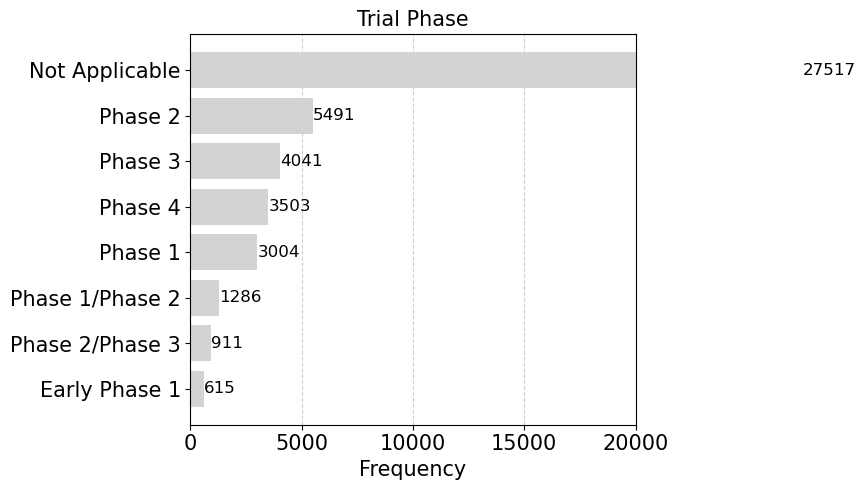

In [21]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = aact_metadata[['nct_id', 'phase']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['phase'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Trial Phase', fontsize=15)
plt.xlim(0, 20000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/phase_frequency.pdf')

# Display the chart
plt.show()

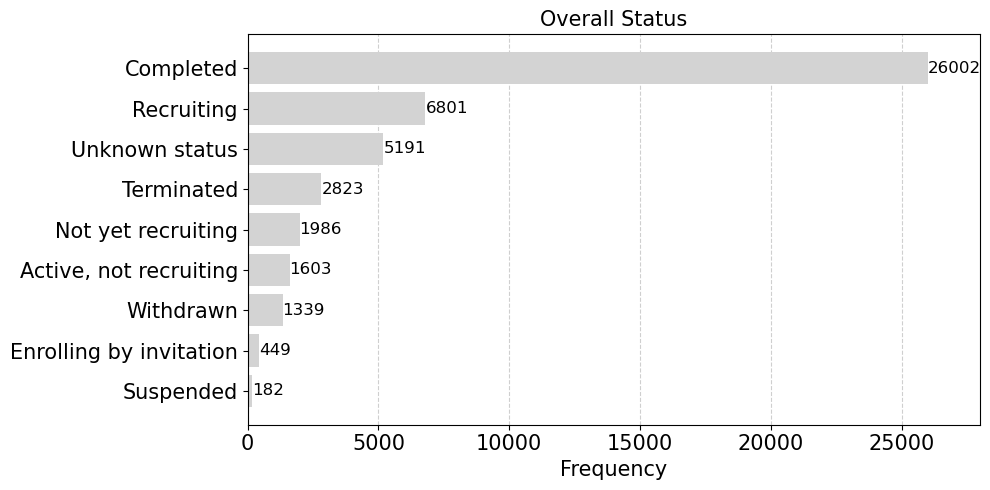

In [24]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = aact_metadata[['nct_id', 'overall_status']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['overall_status'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Overall Status', fontsize=15)
plt.xlim(0, 28000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/status_frequency.pdf')

# Display the chart
plt.show()

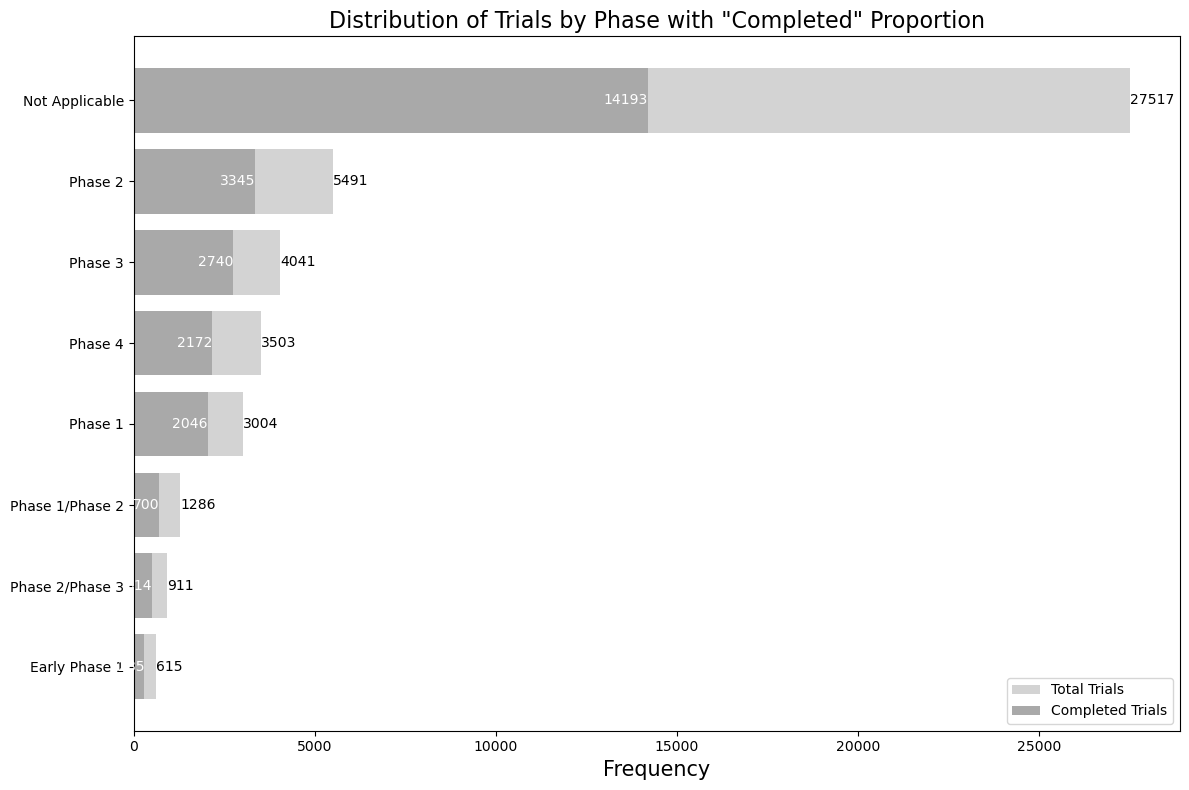

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming aact_metadata is your DataFrame

# Step 1: Count total trials per phase, ensuring unique nct_id within each phase
total_phase_counts = aact_metadata[['nct_id', 'phase']].drop_duplicates()['phase'].value_counts()

# Step 2: Filter 'Completed' status and count completed trials per phase, ensuring unique nct_id
completed_trials = aact_metadata[aact_metadata['overall_status'] == 'Completed']
completed_phase_counts = completed_trials[['nct_id', 'phase']].drop_duplicates()['phase'].value_counts()

# Sorting total_phase_counts in descending order to determine plot order
sorted_phases = total_phase_counts.sort_values(ascending=True).index

# Reindexing completed_phase_counts according to sorted_phases for alignment
completed_phase_counts = completed_phase_counts.reindex(index=sorted_phases).fillna(0)

# Step 3: Plot a horizontal stacked bar chart
plt.figure(figsize=(12, 8))

# Plotting total trials
bars_total = plt.barh(sorted_phases, total_phase_counts.reindex(index=sorted_phases), color='lightgrey', label='Total Trials')

# Plotting completed trials on top of the total trials
bars_completed = plt.barh(sorted_phases, completed_phase_counts, color='darkgrey', label='Completed Trials')

plt.xlabel('Frequency', fontsize=15)
plt.title('Distribution of Trials by Phase with "Completed" Proportion', fontsize=16)
plt.legend()

# Adding labels to the bars
for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', ha='left')

for bar in bars_completed:
    width = bar.get_width()
    # Only label the bar if the width is significant to avoid clutter
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='right', color='white')

plt.tight_layout()
plt.show()


## Start and Completion Years

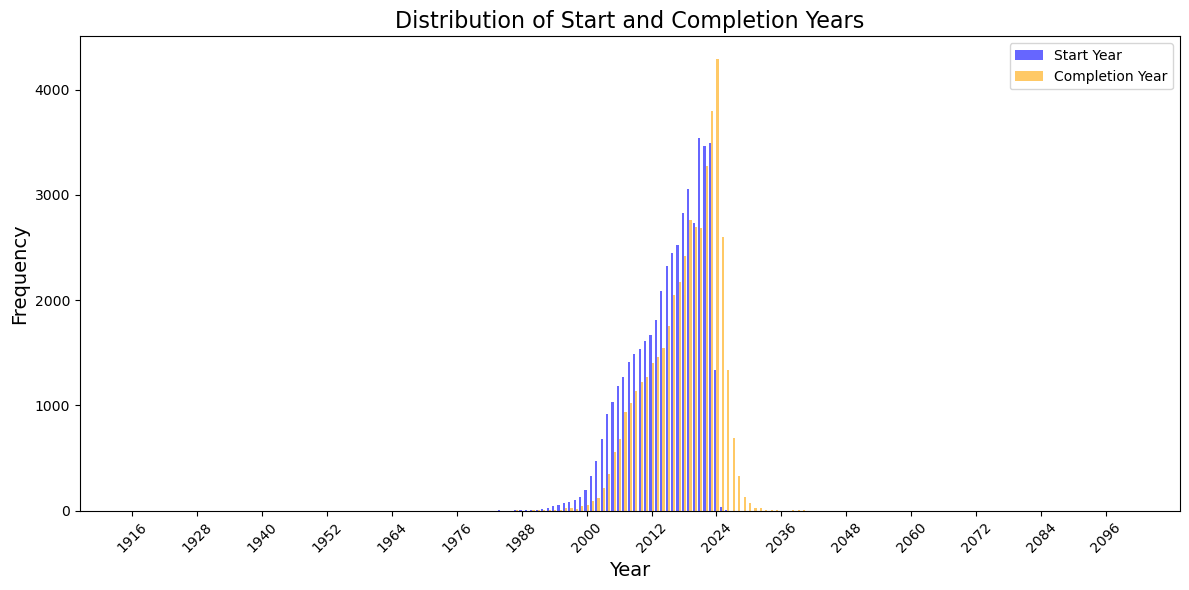

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame)
# unique_rows_years = pd.DataFrame({
#     'start_year': [2001, 2002, 2003, 2004, 2005, 2001, 2002, 2003],
#     'completion_year': [2002, 2003, 2004, 2005, 2006, 2002, 2003, 2004]
# })

# Calculating the distribution of start and completion years
start_year_distribution = unique_rows_years['start_year'].value_counts().sort_index()
completion_year_distribution = unique_rows_years['completion_year'].value_counts().sort_index()

# Ensure year values are integers and calculate the range for x-ticks
start_min_year = int(unique_rows_years['start_year'].min())
start_max_year = int(unique_rows_years['start_year'].max())
completion_min_year = int(unique_rows_years['completion_year'].min())
completion_max_year = int(unique_rows_years['completion_year'].max())

# Calculate the range of years to include in the plot
year_range = range(min(start_min_year, completion_min_year), max(start_max_year, completion_max_year) + 1)

# Adjusting the plotting code for improved year readability
plt.figure(figsize=(12, 6))

# Plotting both distributions with adjusted years for x-ticks
plt.bar(start_year_distribution.index - 0.2, start_year_distribution, color='blue', width=0.4, label='Start Year', alpha=0.6)
plt.bar(completion_year_distribution.index + 0.2, completion_year_distribution, color='orange', width=0.4, label='Completion Year', alpha=0.6)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Start and Completion Years', fontsize=16)

# Calculating the tick step based on the range of years to ensure readability
tick_step = max(1, len(year_range) // 15)  # Ensuring at least one tick step and not more than 15 labels for readability

# Apply the calculated tick step to x-ticks
plt.xticks(ticks=[year for i, year in enumerate(year_range) if i % tick_step == 0], rotation=45)

plt.legend()
plt.tight_layout()

# Displaying the plot with adjusted x-axis ticks for better readability
plt.show()


In [30]:
country_event_frequency = aact_metadata.groupby('country_name')['nct_id'].nunique().reset_index(name='Frequency')
country_event_frequency

,country_name,Frequency
0,Afghanistan,3
1,Albania,2
2,Angola,1
3,Antigua and Barbuda,11
4,Argentina,310
...,...,...
152,Venezuela,15
153,Vietnam,54
154,Virgin Islands (U.S.),3
155,Zambia,9


## Countries

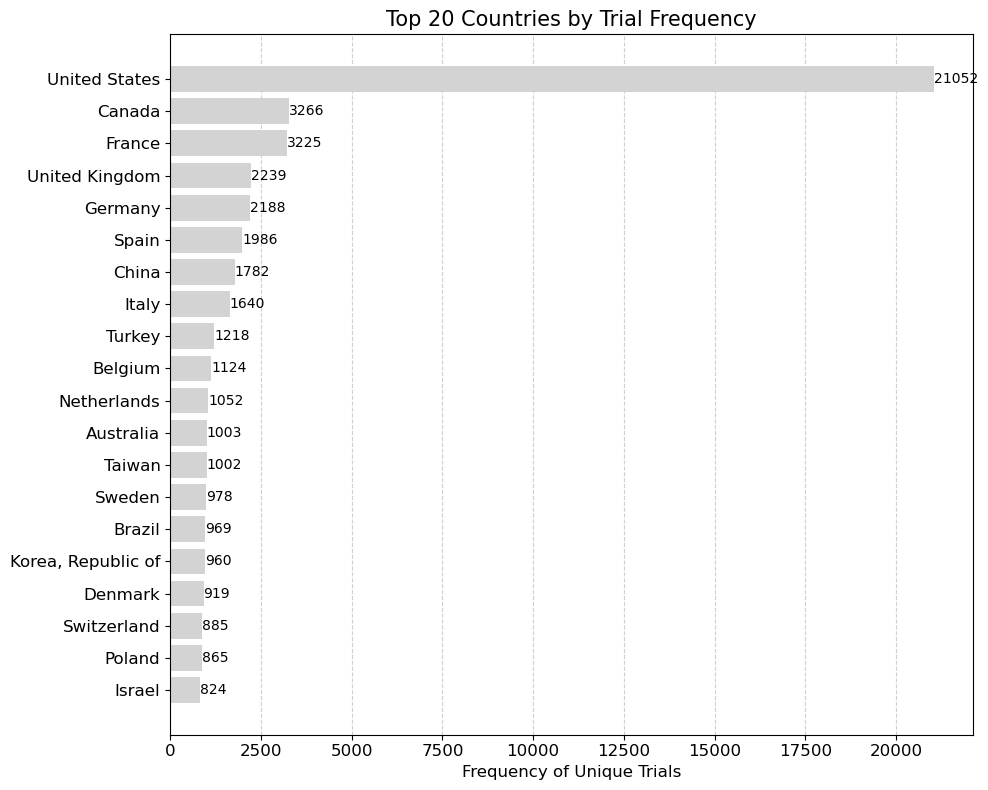

In [31]:
# Sorting the data by Frequency and selecting the top 20
extended_country_event_frequency_sorted = country_event_frequency.sort_values(by='Frequency', ascending=True).tail(20)

# Plotting the top 20 countries
plt.figure(figsize=(10, 8))
bars = plt.barh(extended_country_event_frequency_sorted['country_name'], extended_country_event_frequency_sorted['Frequency'], color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=10)
    
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency of Unique Trials', fontsize=12)
plt.title('Top 20 Countries by Trial Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('viz/contry_frequency.pdf')

# Display the chart
plt.show()

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_12333/3808609261.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


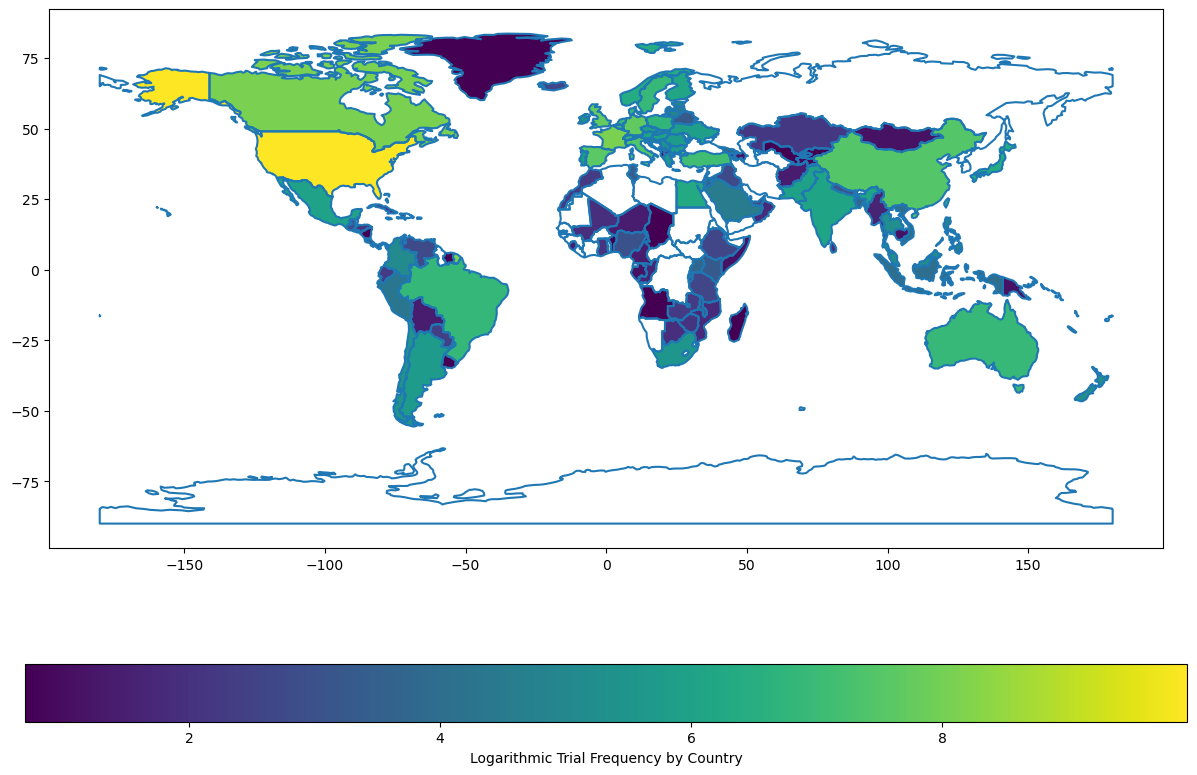

In [32]:
# Convert dictionary to DataFrame
event_df = country_event_frequency
event_df['country_name'] = event_df['country_name'].replace({'United States': 'United States of America'})

# Load world map (ensure you're using the correct method to access the 'naturalearth_lowres' data)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with event data
world = world.merge(event_df, how="left", left_on="name", right_on="country_name")

# Apply a logarithmic transformation to the 'Frequency' column to deal with wide ranges in data
world['Log_Frequency'] = np.log1p(world['Frequency'])

# Plotting with handling zeros as missing data (leaving them white)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Ensure that areas with zero (log1p(0) = 0) are left white by treating them as NaN
world['Log_Frequency'] = world['Log_Frequency'].replace(0, np.nan)

# Plot using the transformed 'Log_Frequency' column
# Setting missing_kwds to ensure NaN values (including those originally zeros) are plotted as white
world.plot(column='Log_Frequency', ax=ax, legend=True,
           missing_kwds={'color': 'white'},
           legend_kwds={'label': "Logarithmic Trial Frequency by Country",
                        'orientation': "horizontal"})

plt.savefig('viz/contry_frequency_map.pdf')

plt.show()


# Diseases

In [33]:
aact_data.head(5)

,nct_id,Neurological Disease,Disease Class,brief_title,study_official_title,brief_summary_description,start_date,completion_date,phase,study_type,overall_status,country_name,intervention_name,intervention_type,start_year,completion_year
0,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Physical activity,Behavioral,2019.0,2026.0
1,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Successful Aging,Behavioral,2019.0,2026.0
2,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Physical activity,Behavioral,2019.0,2026.0
3,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Successful Aging,Behavioral,2019.0,2026.0
4,NCT03890861,"Dementia, Alzheimer Type",Neurodegenerative Diseases,Reducing African Americans' Alzheimer's Diseas...,Reducing African Americans' Alzheimer's Diseas...,The RAATE proposal is designed to determine th...,2019-08-09,2026-11-30,Not Applicable,Interventional,Recruiting,United States,Physical activity,Behavioral,2019.0,2026.0


In [34]:
aact_data.columns

Index(['nct_id', 'Neurological Disease', 'Disease Class', 'brief_title',
       'study_official_title', 'brief_summary_description', 'start_date',
       'completion_date', 'phase', 'study_type', 'overall_status',
       'country_name', 'intervention_name', 'intervention_type', 'start_year',
       'completion_year'],
      dtype='object')

In [35]:
aact_diseases = aact_data[['nct_id', 'Neurological Disease', 'Disease Class', 'phase', 'overall_status','start_year','completion_year']]

In [36]:
aact_diseases[aact_diseases['Neurological Disease']=='Depression']

,nct_id,Neurological Disease,Disease Class,phase,overall_status,start_year,completion_year
240,NCT05268497,Depression,Psychiatry and Psychology Category,Phase 1,Withdrawn,2022.0,2023.0
248,NCT04716777,Depression,Psychiatry and Psychology Category,Not Applicable,Unknown status,2020.0,2023.0
249,NCT04716777,Depression,Psychiatry and Psychology Category,Not Applicable,Unknown status,2020.0,2023.0
261,NCT05268497,Depression,Psychiatry and Psychology Category,Phase 1,Withdrawn,2022.0,2023.0
262,NCT05268497,Depression,Psychiatry and Psychology Category,Phase 1,Withdrawn,2022.0,2023.0
...,...,...,...,...,...,...,...
418235,NCT05810259,Depression,Psychiatry and Psychology Category,Not Applicable,Not yet recruiting,2024.0,2024.0
418530,NCT05356364,Depression,Psychiatry and Psychology Category,Not Applicable,Recruiting,2023.0,2025.0
418531,NCT05356364,Depression,Psychiatry and Psychology Category,Not Applicable,Recruiting,2023.0,2025.0
418532,NCT05356364,Depression,Psychiatry and Psychology Category,Not Applicable,Recruiting,2023.0,2025.0


In [37]:
phase_type_counts

overall_status
Suspended                    182
Enrolling by invitation      449
Withdrawn                   1339
Active, not recruiting      1603
Not yet recruiting          1986
Terminated                  2823
Unknown status              5191
Recruiting                  6801
Completed                  26002
Name: count, dtype: int64

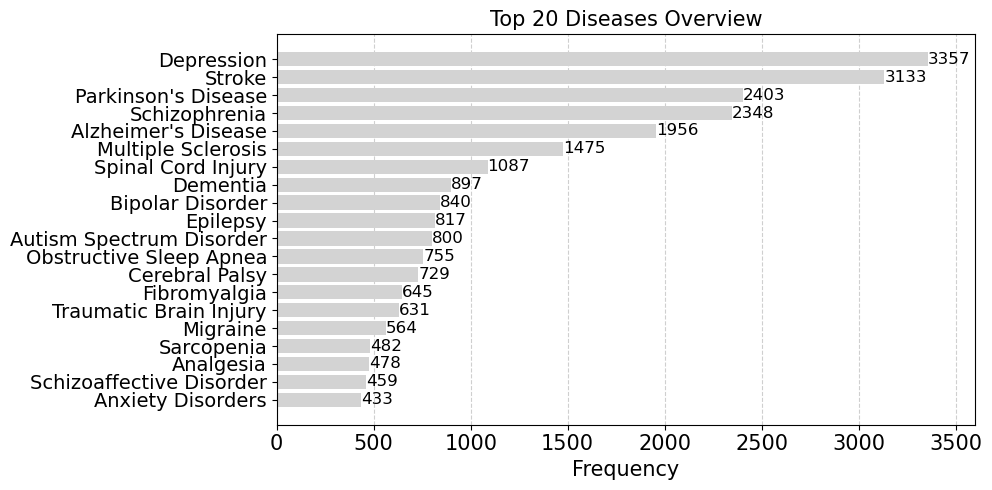

In [38]:
# Keeping only unique nct_id, phase pairs
unique_pairs = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs['Neurological Disease'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True).tail(20)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Top 20 Diseases Overview', fontsize=15)
plt.xlim(0, 3600) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/disease_frequency.pdf')

# Display the chart
plt.show()

## Disease/ All and Completed Trials

In [39]:
# Step 1: Count total trials per disease
total_disease_counts = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Filter 'Completed' status and count completed trials per disease
completed_trials = aact_diseases[aact_diseases['overall_status'] == 'Completed']
completed_disease_counts = completed_trials[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Calculate proportions of completed trials
completed_proportions = (completed_disease_counts / total_disease_counts).fillna(0) * 100  # Proportion in percentage

# Sorting to get top 20 diseases by total count
sorted_diseases = total_disease_counts.sort_values(ascending=True).tail(20)
sorted_completed_proportions = completed_proportions.reindex(index=sorted_diseases.index)
sorted_completed_proportions

Neurological Disease
Anxiety Disorders           57.505774
Schizoaffective Disorder    73.638344
Analgesia                   46.025105
Sarcopenia                  48.547718
Migraine                    61.524823
Traumatic Brain Injury      43.423138
Fibromyalgia                65.426357
Cerebral Palsy              56.515775
Obstructive Sleep Apnea     55.496689
Autism Spectrum Disorder    43.250000
Epilepsy                    60.587515
Bipolar Disorder            66.904762
Dementia                    52.954292
Spinal Cord Injury          46.274149
Multiple Sclerosis          55.593220
Alzheimer's Disease         56.134969
Schizophrenia               68.185690
Parkinson's Disease         53.516438
Stroke                      52.282158
Depression                  60.440870
Name: count, dtype: float64

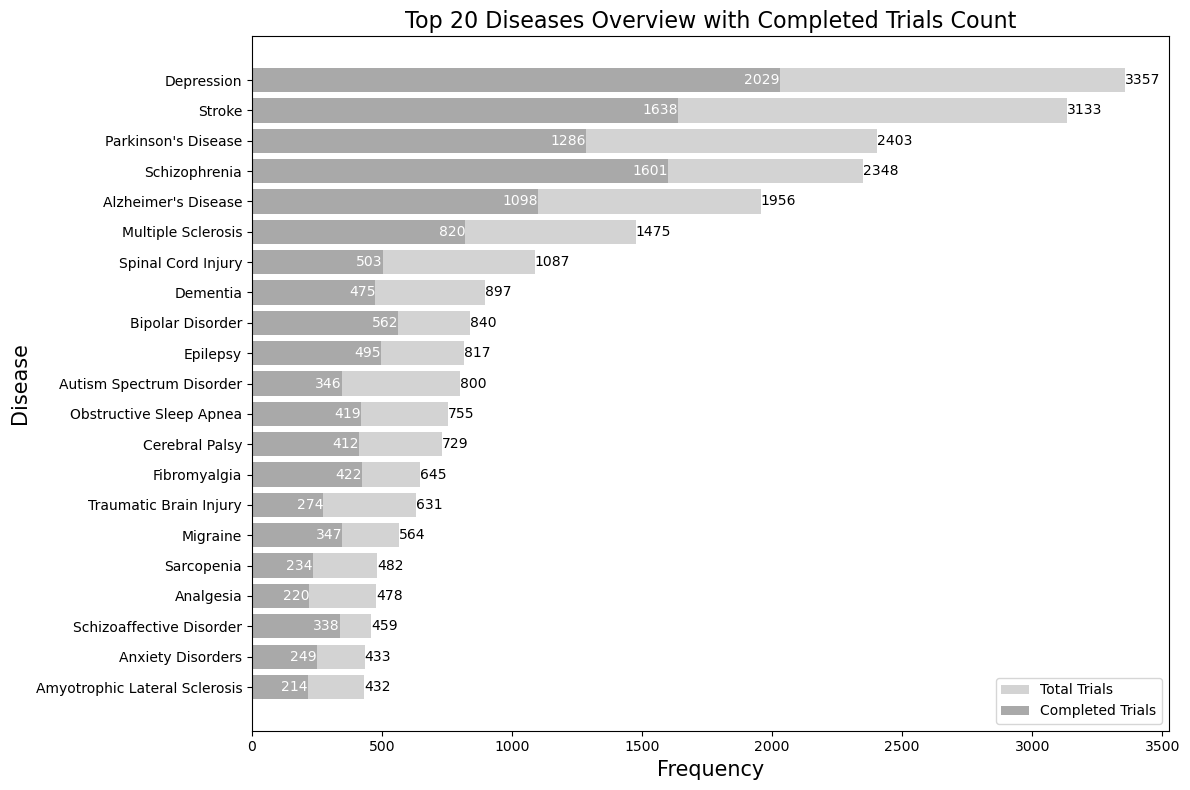

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Count total trials per disease, ensuring unique nct_id within each disease
total_disease_counts = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Step 2: Filter 'Completed' status and count completed trials per disease, ensuring unique nct_id
completed_trials = aact_diseases[aact_diseases['overall_status'] == 'Completed']
completed_disease_counts = completed_trials[['nct_id', 'Neurological Disease']].drop_duplicates()['Neurological Disease'].value_counts()

# Sorting total_disease_counts in descending order to determine plot order and select top diseases
sorted_diseases = total_disease_counts.sort_values(ascending=True).tail(21).index

# Reindexing completed_disease_counts according to sorted_diseases for alignment
completed_disease_counts = completed_disease_counts.reindex(index=sorted_diseases).fillna(0)

# Step 3: Plot a horizontal bar chart
plt.figure(figsize=(12, 8))

# Plotting total trials
bars_total = plt.barh(sorted_diseases, total_disease_counts[sorted_diseases], color='lightgrey', label='Total Trials')

# Plotting completed trials
bars_completed = plt.barh(sorted_diseases, completed_disease_counts[sorted_diseases], color='darkgrey', label='Completed Trials')

plt.ylabel('Disease', fontsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.title('Top 20 Diseases Overview with Completed Trials Count', fontsize=16)
plt.yticks(ticks=range(len(sorted_diseases)), labels=sorted_diseases)
plt.legend()

# Adding labels to the bars
for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', ha='left')

for bar in bars_completed:
    width = bar.get_width()
    # Only label the bar if the width is significant to avoid clutter
    if width > 0:
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', ha='right', color='white')

plt.tight_layout()
plt.show()


In [41]:
aact_diseases['phase'].isnull().sum()

41

## Disease/ Phase

In [42]:
# Aggregate trials by disease and phase, counting unique nct_ids
disease_phase_counts = aact_diseases.groupby(['Neurological Disease', 'phase'])['nct_id'].nunique().reset_index()

# Pivot the data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df['Total Trials'] = pivot_df.sum(axis=1)
top_20_diseases = pivot_df.sort_values('Total Trials', ascending=False).head(21)
top_20_diseases

phase,Early Phase 1,Not Applicable,Phase 1,Phase 1/Phase 2,Phase 2,Phase 2/Phase 3,Phase 3,Phase 4,Total Trials
Neurological Disease,,,,,,,,,
Depression,40.0,2452.0,130.0,48.0,220.0,51.0,165.0,251.0,3357.0
Stroke,37.0,2459.0,102.0,66.0,191.0,39.0,125.0,114.0,3133.0
Parkinson's Disease,33.0,1355.0,244.0,79.0,350.0,46.0,165.0,131.0,2403.0
Schizophrenia,20.0,933.0,258.0,49.0,280.0,42.0,358.0,408.0,2348.0
Alzheimer's Disease,41.0,744.0,353.0,66.0,403.0,38.0,211.0,100.0,1956.0
Multiple Sclerosis,15.0,827.0,110.0,62.0,171.0,28.0,147.0,115.0,1475.0
Spinal Cord Injury,16.0,788.0,52.0,47.0,89.0,26.0,29.0,40.0,1087.0
Dementia,3.0,696.0,27.0,14.0,56.0,17.0,45.0,39.0,897.0
Bipolar Disorder,5.0,390.0,40.0,14.0,71.0,9.0,146.0,165.0,840.0


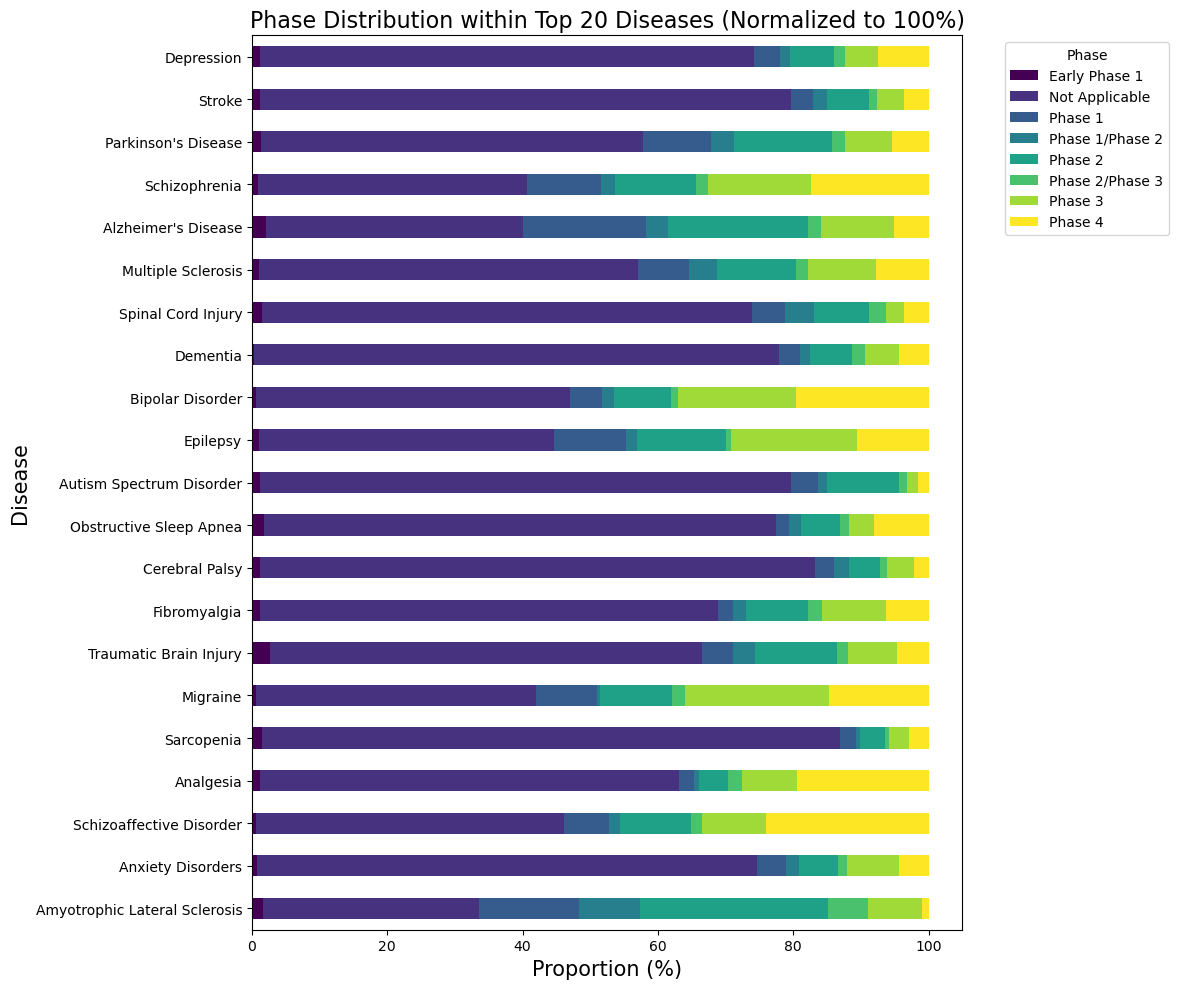

In [43]:
# Aggregate trials by disease and phase, counting unique nct_ids
disease_phase_counts = aact_diseases.groupby(['Neurological Disease', 'phase'])['nct_id'].nunique().reset_index()

# Pivot the data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df = disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df['Total Trials'] = pivot_df.sum(axis=1)
top_20_diseases = pivot_df.sort_values('Total Trials', ascending=False).head(21)

# Drop the 'Total Trials' column as it's no longer needed for plotting
top_20_diseases = top_20_diseases.drop(columns='Total Trials')

# Normalize phase counts to proportions within each disease
normalized_phases = top_20_diseases.div(top_20_diseases.sum(axis=1), axis=0) * 100

# Reverse the row order of normalized_phases to have the largest on top
normalized_phases_reversed = normalized_phases.iloc[::-1]

# Plotting with the reversed DataFrame
fig, ax = plt.subplots(figsize=(12, 10))
normalized_phases_reversed.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', edgecolor='none')

plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.title('Phase Distribution within Top 20 Diseases (Normalized to 100%)', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
# Exclude trials with the phase 'Not Applicable'
filtered_disease_phase_counts = disease_phase_counts[disease_phase_counts['phase'] != 'Not Applicable']

# Proceed with the pivoting, normalization, and plotting as before, using the filtered dataset

# Pivot the filtered data to have diseases as rows and phases as columns, filling missing values with 0
pivot_df_filtered = filtered_disease_phase_counts.pivot(index='Neurological Disease', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per disease to identify the top 20 diseases
pivot_df_filtered['Total Trials'] = pivot_df_filtered.sum(axis=1)
top_20_diseases_filtered = pivot_df_filtered.sort_values('Total Trials', ascending=False).head(20)

# Drop the 'Total Trials' column as it's no longer needed for plotting
top_20_diseases_filtered = top_20_diseases_filtered.drop(columns='Total Trials')

# Normalize phase counts to proportions within each disease
normalized_phases_filtered = top_20_diseases_filtered.div(top_20_diseases_filtered.sum(axis=1), axis=0) * 100

# Reverse the row order of normalized_phases to have the largest on top
normalized_phases_filtered_reversed = normalized_phases_filtered.iloc[::-1]

# Plotting with the filtered and reversed DataFrame
# fig, ax = plt.subplots(figsize=(12, 10))
# normalized_phases_filtered_reversed.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', edgecolor='none')

# plt.xlabel('Proportion (%)', fontsize=15)
# plt.ylabel('Disease', fontsize=15)
# plt.title('Phase Distribution within Top 20 Diseases (Excluding "Not Applicable")', fontsize=16)
# plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


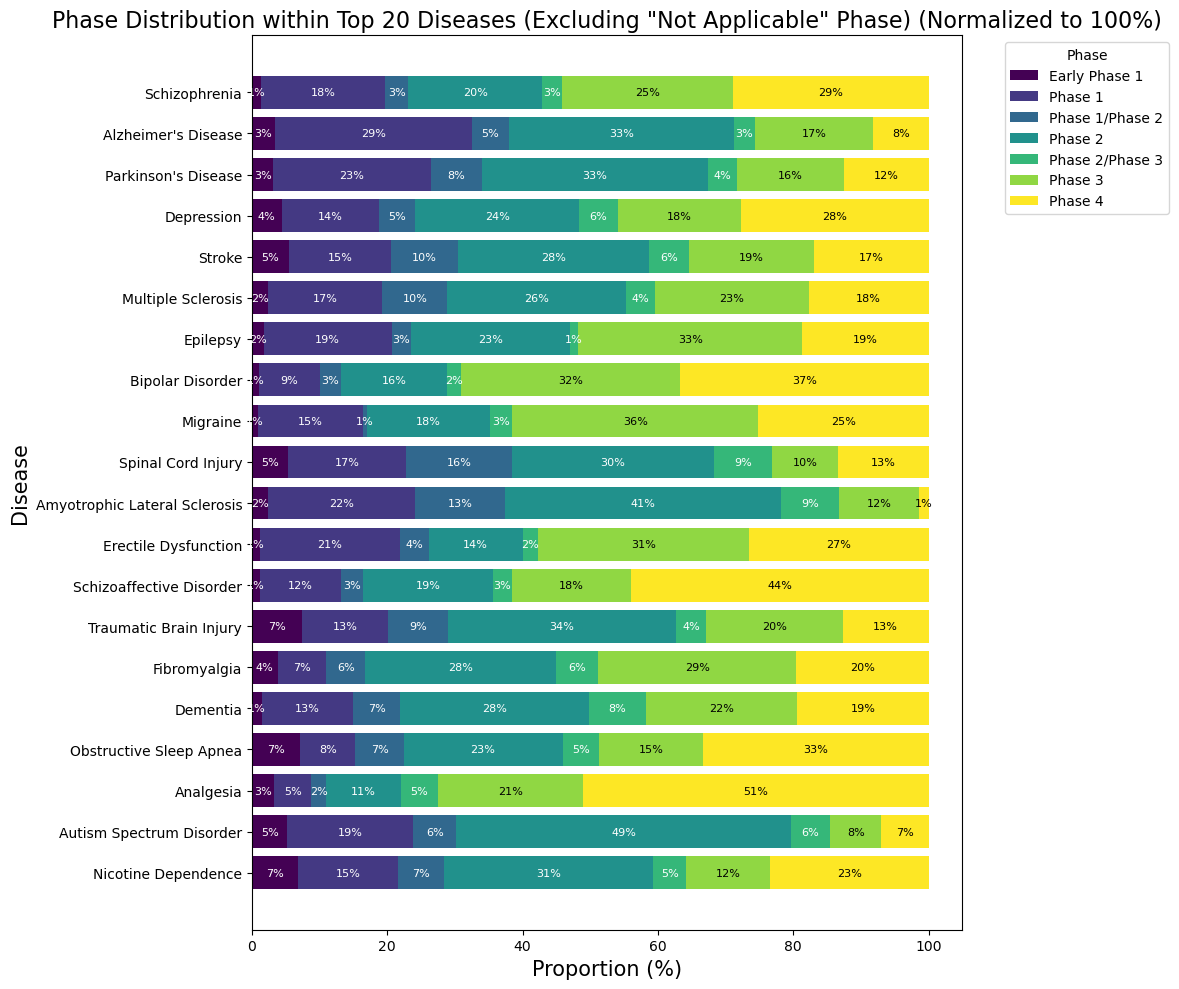

In [45]:
import numpy as np

# Assuming normalized_phases_filtered_reversed is prepared and contains the data to be plotted
# Convert the DataFrame to a numpy array for easier iteration in plotting
data_array = normalized_phases_filtered_reversed.to_numpy()

# The y-axis positions for each disease
y_positions = np.arange(len(normalized_phases_filtered_reversed))

# Setting up the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Colors for each phase, assuming a limited number of phases
colors = plt.cm.viridis(np.linspace(0, 1, normalized_phases_filtered_reversed.shape[1]))

# Cumulative array to keep track of where to start the next bar segment
cumulative = np.zeros(len(normalized_phases_filtered_reversed))

for i, (phase_name, color) in enumerate(zip(normalized_phases_filtered_reversed.columns, colors)):
    # The height of the bar for this phase
    phase_data = data_array[:, i]
    
    # Plotting the bar segment
    ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    
    # Updating the cumulative sum for the next bar segment
    cumulative += phase_data
    
    # Adding text labels within each bar segment
    for y, (x_position, width) in enumerate(zip(cumulative, phase_data)):
        if width > 0:  # Only add labels for visible segments
            label_color = 'black' if phase_name in ['Phase 3', 'Phase 4'] else 'white'
            label = f'{width:.0f}%'
            ax.text(x_position - width / 2, y, label, va='center', ha='center', color=label_color, fontsize=8)


# Setting the y-ticks to correspond to diseases
ax.set_yticks(y_positions)
ax.set_yticklabels(normalized_phases_filtered_reversed.index)

plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Disease', fontsize=15)
plt.title('Phase Distribution within Top 20 Diseases (Excluding "Not Applicable" Phase) (Normalized to 100%)', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


## Disease/ Time

In [46]:
# Keeping only unique nct_id, phase pairs
unique_pairs = aact_diseases[['nct_id', 'Neurological Disease']].drop_duplicates()

# Counting the number of nct_ids per phase type
disease_counts = unique_pairs['Neurological Disease'].value_counts()
disease_counts = disease_counts.sort_values(ascending=False).head(10)
disease_counts

Neurological Disease
Depression             3357
Stroke                 3133
Parkinson's Disease    2403
Schizophrenia          2348
Alzheimer's Disease    1956
Multiple Sclerosis     1475
Spinal Cord Injury     1087
Dementia                897
Bipolar Disorder        840
Epilepsy                817
Name: count, dtype: int64

In [47]:
aact_diseases_top_10 = aact_diseases[aact_diseases['Neurological Disease'].isin(disease_counts.index)]
aact_diseases_top_10 = aact_diseases_top_10[['nct_id', 'Neurological Disease','start_year']].drop_duplicates()
aact_diseases_top_10_year_count = aact_diseases_top_10.groupby(['start_year', 'Neurological Disease']).size().reset_index(name='count')
aact_diseases_top_10_year_count

,start_year,Neurological Disease,count
0,1982.0,Stroke,1
1,1987.0,Depression,4
2,1988.0,Depression,1
3,1988.0,Epilepsy,2
4,1988.0,Multiple Sclerosis,2
...,...,...,...
325,2025.0,Stroke,2
326,2026.0,Alzheimer's Disease,1
327,2026.0,Stroke,1
328,2027.0,Depression,1


In [48]:
aact_diseases_top_10_year_count.columns

Index(['start_year', 'Neurological Disease', 'count'], dtype='object')

In [49]:
aact_diseases_top_10_year_count_til_2023 = aact_diseases_top_10_year_count[aact_diseases_top_10_year_count['start_year'] <= 2023]

Neurological Disease
Alzheimer's Disease    Axes(0.125,0.11;0.775x0.77)
Bipolar Disorder       Axes(0.125,0.11;0.775x0.77)
Dementia               Axes(0.125,0.11;0.775x0.77)
Depression             Axes(0.125,0.11;0.775x0.77)
Epilepsy               Axes(0.125,0.11;0.775x0.77)
Multiple Sclerosis     Axes(0.125,0.11;0.775x0.77)
Parkinson's Disease    Axes(0.125,0.11;0.775x0.77)
Schizophrenia          Axes(0.125,0.11;0.775x0.77)
Spinal Cord Injury     Axes(0.125,0.11;0.775x0.77)
Stroke                 Axes(0.125,0.11;0.775x0.77)
Name: count, dtype: object

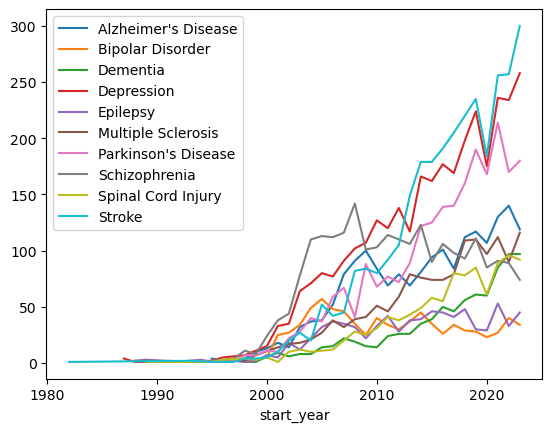

In [50]:
aact_diseases_top_10_year_count_til_2023.set_index('start_year', inplace=True)
aact_diseases_top_10_year_count_til_2023.groupby('Neurological Disease')['count'].plot(legend=True)

# Interventions

In [51]:
aact_disease_intervention = aact_data[['nct_id', 'Neurological Disease', 'Disease Class', 'intervention_name', 'intervention_type', 'phase', 'overall_status']]

In [52]:
filtered_df = aact_disease_intervention[(aact_disease_intervention['intervention_type'] == 'Drug') | (aact_disease_intervention['intervention_type'] == 'Biological')]
#filtered_df = aact_disease_intervention[(aact_disease_intervention['intervention_name'] != 'Saline') & (aact_disease_intervention['intervention_type'] != 'Normal saline')]


In [53]:
filtered_df.head(10)

,nct_id,Neurological Disease,Disease Class,intervention_name,intervention_type,phase,overall_status
40,NCT03502551,Suicide,Psychiatry and Psychology Category,Ketamine,Drug,Phase 2,Withdrawn
41,NCT03502551,Suicide,Psychiatry and Psychology Category,Ketamine,Drug,Phase 2,Withdrawn
43,NCT05216770,Tremor,Neurologic Manifestations,Laryngeal sensory block with topical bupivacaine,Drug,Early Phase 1,Recruiting
45,NCT05216770,Tremor,Neurologic Manifestations,Laryngeal sensory block with topical bupivacaine,Drug,Early Phase 1,Recruiting
47,NCT05216770,Tremor,Neurologic Manifestations,Laryngeal sensory block with topical bupivacaine,Drug,Early Phase 1,Recruiting
72,NCT03348735,Neuropathic Pain,Neuromuscular Diseases,Lidocaine patch 5%,Drug,Phase 4,Terminated
80,NCT05995600,Transient Ischemic Attack,Central Nervous System Diseases,Antiplatelet Drug,Drug,Phase 4,Not yet recruiting
81,NCT05995600,Transient Ischemic Attack,Central Nervous System Diseases,Warfarin,Drug,Phase 4,Not yet recruiting
82,NCT05995600,Transient Ischemic Attack,Central Nervous System Diseases,Antiplatelet Drug,Drug,Phase 4,Not yet recruiting
83,NCT03348735,Neuropathic Pain,Neuromuscular Diseases,Capsaicin 8% Patch,Drug,Phase 4,Terminated


In [54]:
filtered_df['intervention_name'].isnull().sum()

0

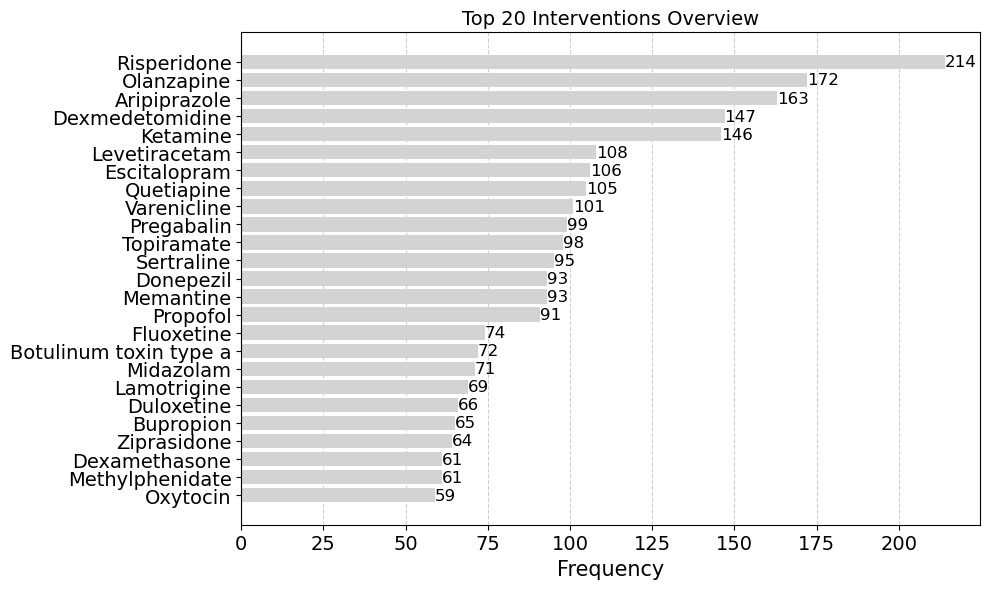

In [55]:
filtered_df = filtered_df[~filtered_df['intervention_name'].str.contains('placebo', case=False, regex=True)]
filtered_df = filtered_df[~filtered_df['intervention_name'].str.contains('saline', case=False, regex=True)]

filtered_df['intervention_name'] = filtered_df['intervention_name'].str.capitalize()

# Keeping only unique nct_id, phase pairs
unique_pairs = filtered_df[['nct_id', 'intervention_name']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs['intervention_name'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True).tail(25)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=15)
plt.title('Top 20 Interventions Overview', fontsize=14)
#plt.xlim(0, 200) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/interventions_frequency.pdf')

# Display the chart
plt.show()

In [63]:
# Aggregate trials by disease and phase, counting unique nct_ids
intervention_phase_counts = filtered_df.groupby(['intervention_name', 'phase'])['nct_id'].nunique().reset_index()

intervention_phase_counts_filtered = intervention_phase_counts[intervention_phase_counts['phase'] != 'Not Applicable']

# Pivot the filtered data to have interventions as rows and phases as columns
pivot_intervention_df_filtered = intervention_phase_counts_filtered.pivot(index='intervention_name', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per intervention again without 'Not Applicable' phase
pivot_intervention_df_filtered['Total Trials'] = pivot_intervention_df_filtered.sum(axis=1)
top_interventions_filtered = pivot_intervention_df_filtered.sort_values('Total Trials', ascending=False).head(20)
top_interventions_filtered

phase,Early Phase 1,Phase 1,Phase 1/Phase 2,Phase 2,Phase 2/Phase 3,Phase 3,Phase 4,Total Trials
intervention_name,,,,,,,,
Risperidone,1.0,12.0,3.0,30.0,3.0,59.0,80.0,188.0
Olanzapine,1.0,5.0,4.0,19.0,1.0,45.0,75.0,150.0
Aripiprazole,1.0,10.0,3.0,15.0,3.0,47.0,66.0,145.0
Ketamine,10.0,25.0,11.0,36.0,7.0,7.0,29.0,125.0
Dexmedetomidine,4.0,5.0,4.0,10.0,6.0,18.0,65.0,112.0
Quetiapine,0.0,3.0,2.0,9.0,4.0,22.0,53.0,93.0
Levetiracetam,0.0,2.0,5.0,26.0,2.0,32.0,26.0,93.0
Pregabalin,1.0,1.0,1.0,15.0,3.0,47.0,24.0,92.0
Topiramate,1.0,6.0,0.0,19.0,3.0,37.0,21.0,87.0


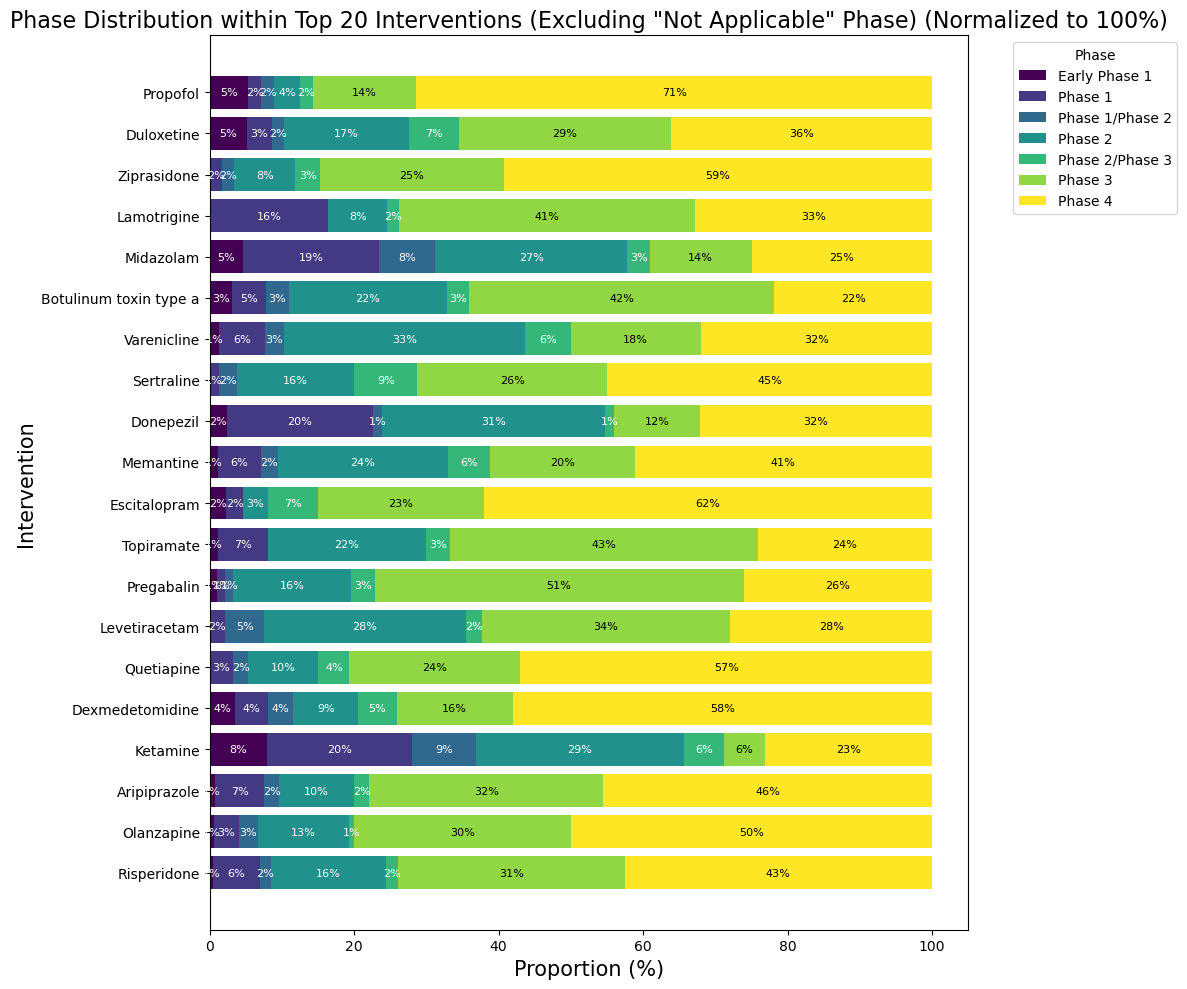

In [64]:
# Step 1: Exclude 'Not Applicable' phase from the analysis
intervention_phase_counts_filtered = intervention_phase_counts[intervention_phase_counts['phase'] != 'Not Applicable']

# Pivot the filtered data to have interventions as rows and phases as columns
pivot_intervention_df_filtered = intervention_phase_counts_filtered.pivot(index='intervention_name', columns='phase', values='nct_id').fillna(0)

# Calculate total trials per intervention again without 'Not Applicable' phase
pivot_intervention_df_filtered['Total Trials'] = pivot_intervention_df_filtered.sum(axis=1)
top_interventions_filtered = pivot_intervention_df_filtered.sort_values('Total Trials', ascending=False).head(20)

# Drop the 'Total Trials' column for plotting
top_interventions_filtered = top_interventions_filtered.drop(columns='Total Trials')

# Normalize phase counts to proportions within each intervention
normalized_phases_intervention_filtered = top_interventions_filtered.div(top_interventions_filtered.sum(axis=1), axis=0) * 100

# Convert the DataFrame to a numpy array for plotting
data_array = normalized_phases_intervention_filtered.to_numpy()
y_positions = np.arange(len(normalized_phases_intervention_filtered))

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0, 1, normalized_phases_intervention_filtered.shape[1]))
cumulative = np.zeros(len(normalized_phases_intervention_filtered))

for i, (phase_name, color) in enumerate(zip(normalized_phases_intervention_filtered.columns, colors)):
    phase_data = data_array[:, i]
    ax.barh(y_positions, phase_data, color=color, left=cumulative, edgecolor='none', label=phase_name)
    cumulative += phase_data
    for y, (x_position, width) in enumerate(zip(cumulative, phase_data)):
        label_color = 'black' if phase_name in ['Phase 3', 'Phase 4'] else 'white'
        label = f'{width:.0f}%' if width > 0 else ''
        ax.text(x_position - width / 2, y, label, va='center', ha='center', color=label_color, fontsize=8)

ax.set_yticks(y_positions)
ax.set_yticklabels(normalized_phases_intervention_filtered.index)
plt.xlabel('Proportion (%)', fontsize=15)
plt.ylabel('Intervention', fontsize=15)
plt.title('Phase Distribution within Top 20 Interventions (Excluding "Not Applicable" Phase) (Normalized to 100%)', fontsize=16)
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Intervention/ Disease

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_12333/3514300219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_unique['disease_intervention_pair'] = filtered_df_unique['Neurological Disease'] + ' - ' + filtered_df_unique['intervention_name']


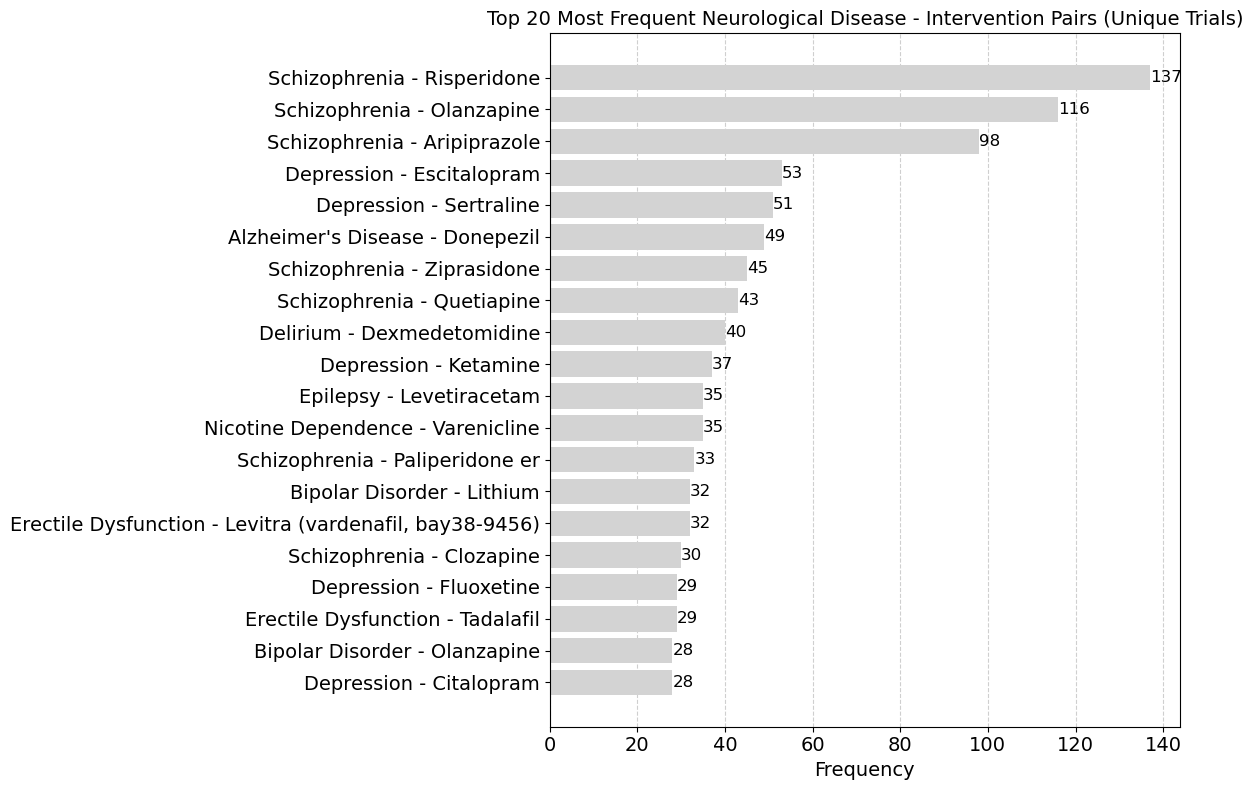

In [58]:
# Normalize 'intervention_name' to start with a capital letter
filtered_df['intervention_name'] = filtered_df['intervention_name'].str.capitalize()

# Drop duplicates based on 'nct_id' to ensure uniqueness
filtered_df_unique = filtered_df.drop_duplicates(subset=['nct_id', 'Neurological Disease', 'intervention_name'])

# Create pairs of unique 'nct_id'
filtered_df_unique['disease_intervention_pair'] = filtered_df_unique['Neurological Disease'] + ' - ' + filtered_df_unique['intervention_name']

# Count the frequency of each unique pair
pair_counts_unique = filtered_df_unique['disease_intervention_pair'].value_counts()

# Select the top 20 most frequent pairs
top_20_pairs_unique = pair_counts_unique.head(20).sort_values(ascending=True)  # Sort ascending for plot layout

# Plot with specified formatting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_pairs_unique.index, top_20_pairs_unique, color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 20 Most Frequent Neurological Disease - Intervention Pairs (Unique Trials)', fontsize=14)
plt.tight_layout()

plt.show()


In [59]:
# Step 1: Drop duplicates based on 'nct_id' and 'intervention_name'
unique_interventions_df = filtered_df[['nct_id', 'intervention_name', 'Neurological Disease']].drop_duplicates()

# Step 2: Identify the top 10 interventions
top_10_interventions = unique_interventions_df['intervention_name'].value_counts().head(10).index

# Step 3: Create the dictionary for top 10 interventions with unique diseases
intervention_diseases_dict = {}
for intervention in top_10_interventions:
    # Get the unique diseases tested for each intervention
    unique_diseases = set(unique_interventions_df[unique_interventions_df['intervention_name'] == intervention]['Neurological Disease'])
    intervention_diseases_dict[intervention] = unique_diseases

intervention_diseases_dict


{'Risperidone': {'Aggression',
  "Alzheimer's Disease",
  'Anorexia Nervosa',
  'Anxiety Disorder',
  'Anxiety Disorders',
  'Attention Deficit and Disruptive Behavior Disorders',
  'Autism Spectrum Disorder',
  'Bipolar Depression',
  'Bipolar Disorder',
  'Bipolar Disorders',
  'Borderline Personality Disorder',
  'Cannabis Abuse',
  'Cannabis Dependence',
  'Cannabis-Related Disorder',
  'Child Behavior Disorders',
  'Child Development Disorders, Pervasive',
  'Chorea',
  'Cocaine Dependence',
  'Cocaine-Related Disorders',
  'Delirium',
  'Dementia',
  'Dementia, Alzheimer Type',
  'Dementia, Vascular',
  'Depression',
  'Depressive Disorder',
  'Developmental Delay Disorder',
  'Developmental Disabilities',
  'Disruptive Behavior Disorder',
  'Dyskinesia, Drug-Induced',
  'Huntington Disease',
  'Learning Disorders',
  'Manic Disorder',
  'Mental Disorders',
  'Mental Retardation',
  'Obsessive-Compulsive Disorder',
  'Panic Disorder',
  'Pervasive Development Disorders',
  'Post-

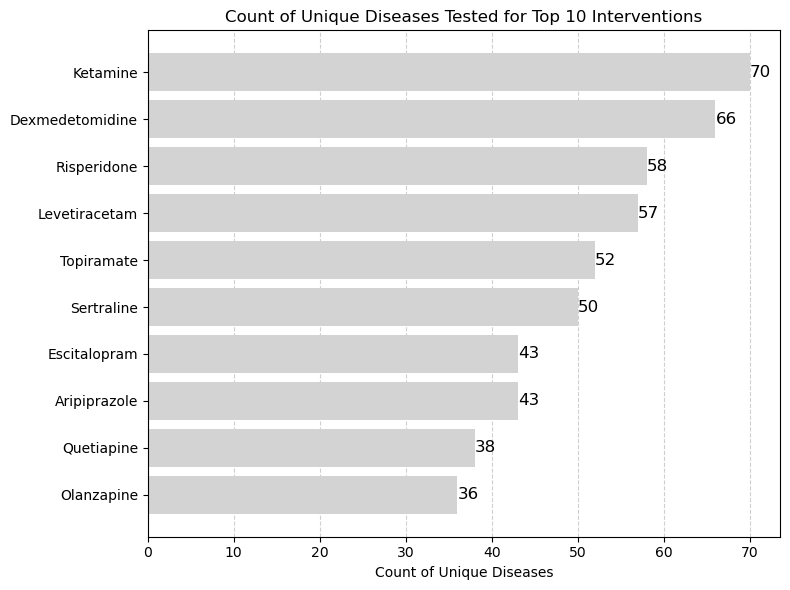

In [62]:
# Calculate unique diseases count for each intervention
unique_diseases_counts = [len(diseases) for diseases in intervention_diseases_dict.values()]
# Extract the interventions list for ordering
interventions = list(intervention_diseases_dict.keys())

# Sort interventions by the count of unique diseases in descending order
sorted_indices = sorted(range(len(unique_diseases_counts)), key=lambda i: unique_diseases_counts[i], reverse=False)
sorted_interventions = [interventions[i] for i in sorted_indices]
sorted_unique_diseases_counts = [unique_diseases_counts[i] for i in sorted_indices]

# Plotting with sorted data
plt.figure(figsize=(8, 6))
bars = plt.barh(sorted_interventions, sorted_unique_diseases_counts, color='lightgrey', zorder=2)

# Add labels to each bar
for bar, count in zip(bars, sorted_unique_diseases_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}', va='center', fontsize=12)

plt.xlabel('Count of Unique Diseases')
#plt.ylabel('Intervention')
plt.title('Count of Unique Diseases Tested for Top 10 Interventions')
plt.tight_layout()

# Include grid lines on the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

plt.show()
